<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

### Loading dataset

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Basic description on dataset

In [3]:
print house.shape
house.columns

(1460, 81)


Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [4]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Missing values

In [6]:
percent_missing = (100*(house.isnull().sum())/house.shape[0]).round(1) 
percent_missing.sort_values(ascending = False).head(20)

PoolQC          99.5
MiscFeature     96.3
Alley           93.8
Fence           80.8
FireplaceQu     47.3
LotFrontage     17.7
GarageCond       5.5
GarageType       5.5
GarageYrBlt      5.5
GarageFinish     5.5
GarageQual       5.5
BsmtExposure     2.6
BsmtFinType2     2.6
BsmtFinType1     2.5
BsmtCond         2.5
BsmtQual         2.5
MasVnrArea       0.5
MasVnrType       0.5
Electrical       0.1
Utilities        0.0
dtype: float64

Referring back to the data description, all categorical NaN values, except for Electrical, represent an absence of the feature. Therefore, they should be replaced with 'None'.

Electrical should only contain 'SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix' based on the data description. Therefore, any NaN values could be actual missing values and should be dropped as NaN values only account for 0.1% of all rows.

### Dealing with categorical NaN values

In [7]:
house[house['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [8]:
# dropping the row with the NaN value 
house.drop(house['Electrical'][house.Electrical.isnull()].index[0], inplace=True) 

In [9]:
# Replace all categorical NaN with 'None'
categories = ['BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual','MasVnrType', 'GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt','MiscFeature','FireplaceQu','Fence','PoolQC','Alley']
house[categories] = house[categories].replace(np.nan, 'None', inplace = True)        
house.head(10)

/Users/kamtingcheung/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


### Dealing with non-categorical NaN values

There are two non categorical variables 'MasVnrArea' and 'LotFrontage' with NaN values. Since they should not be 0, the mean of these individual variables will be imputated.

In [10]:
house[(house['MasVnrArea'].isnull()) & (house['MasVnrType']=='None')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [11]:
# Fill NaN with mean
meanvnr = house['MasVnrArea'].mean()
house['MasVnrArea'].fillna(meanvnr, inplace=True)

meanlot = house['LotFrontage'].mean()
house['LotFrontage'].fillna(meanlot, inplace=True)

### Drop all non residental from dataset

In [12]:
residential_house = house.drop(house[(house.MSZoning == 'A') | (house.MSZoning == 'C (all)') | (house.MSZoning == 'I')].index)


In [13]:
residential_house['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'RH'], dtype=object)

### Converting categorical fixed variables to dummy variables

In [14]:
dummy_columns = ['MSZoning','Street','Alley','LotShape','Electrical',
                 'LandContour','Utilities','LotConfig','LandSlope','Neighborhood', 
                 'Condition1', 'Condition2', 'BldgType','HouseStyle',
                  'Foundation','GarageType'
                ]
house_dummies = pd.get_dummies(residential_house[dummy_columns])

In [15]:
res_house_dummy = residential_house.join(house_dummies)

In [16]:
# Drop the actual columns
res_house_dummy = res_house_dummy.drop(dummy_columns, axis=1)

In [17]:
res_house_dummy.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1,60,65.0,8450,7,5,2003,2003,Gable,CompShg,...,0,1,0,0,0,0,1,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,Gable,CompShg,...,0,0,0,0,0,1,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,Gable,CompShg,...,0,1,0,0,0,0,1,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,Gable,CompShg,...,0,1,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,Gable,CompShg,...,0,1,0,0,0,0,1,0,0,0


### Separate train (pre 2010) and test (2010) data

In [18]:
train = res_house_dummy[res_house_dummy['YrSold']<2010]

train.YrSold.values

array([2008, 2007, 2008, ..., 2009, 2007, 2008])

In [19]:
test = res_house_dummy[res_house_dummy['YrSold']==2010]

test.YrSold.values

array([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 20

### Identifying fixed features that can predict price

To identify features that can predict price, we need to calculate the correlation of all variables with sales price and filter out variables which correlate less than abs 0.5.Using these filtered features we will then create a correltion matrix to determine which of these features display multicollinerity with other dependent variables. Similar features can either be merged into one compound feature or just one of th features included in subsequent analysis 

In [20]:
#array of correlation values for each variable vs. SalePrice 
corr1 = train.corr()['SalePrice'] 
# just return correlation values greater than abs(0.5)
corr = corr1[np.abs(corr1) > 0.5]  
corr = pd.DataFrame(data=corr,columns= ['SalePrice'])
corr = corr.drop_duplicates().sort_values('SalePrice',ascending =False)
corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790336
GrLivArea,0.708201
GarageCars,0.642128
GarageArea,0.631128
TotalBsmtSF,0.604045
1stFlrSF,0.598556
FullBath,0.562860
TotRmsAbvGrd,0.528788
YearBuilt,0.512537


Fixed features that can predict price are:

- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- FullBath: Full bathrooms above grade
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- YearBuilt: Original construction date

Plot the correlation matrix (Heatmap) of these fixed features variables with sales price.

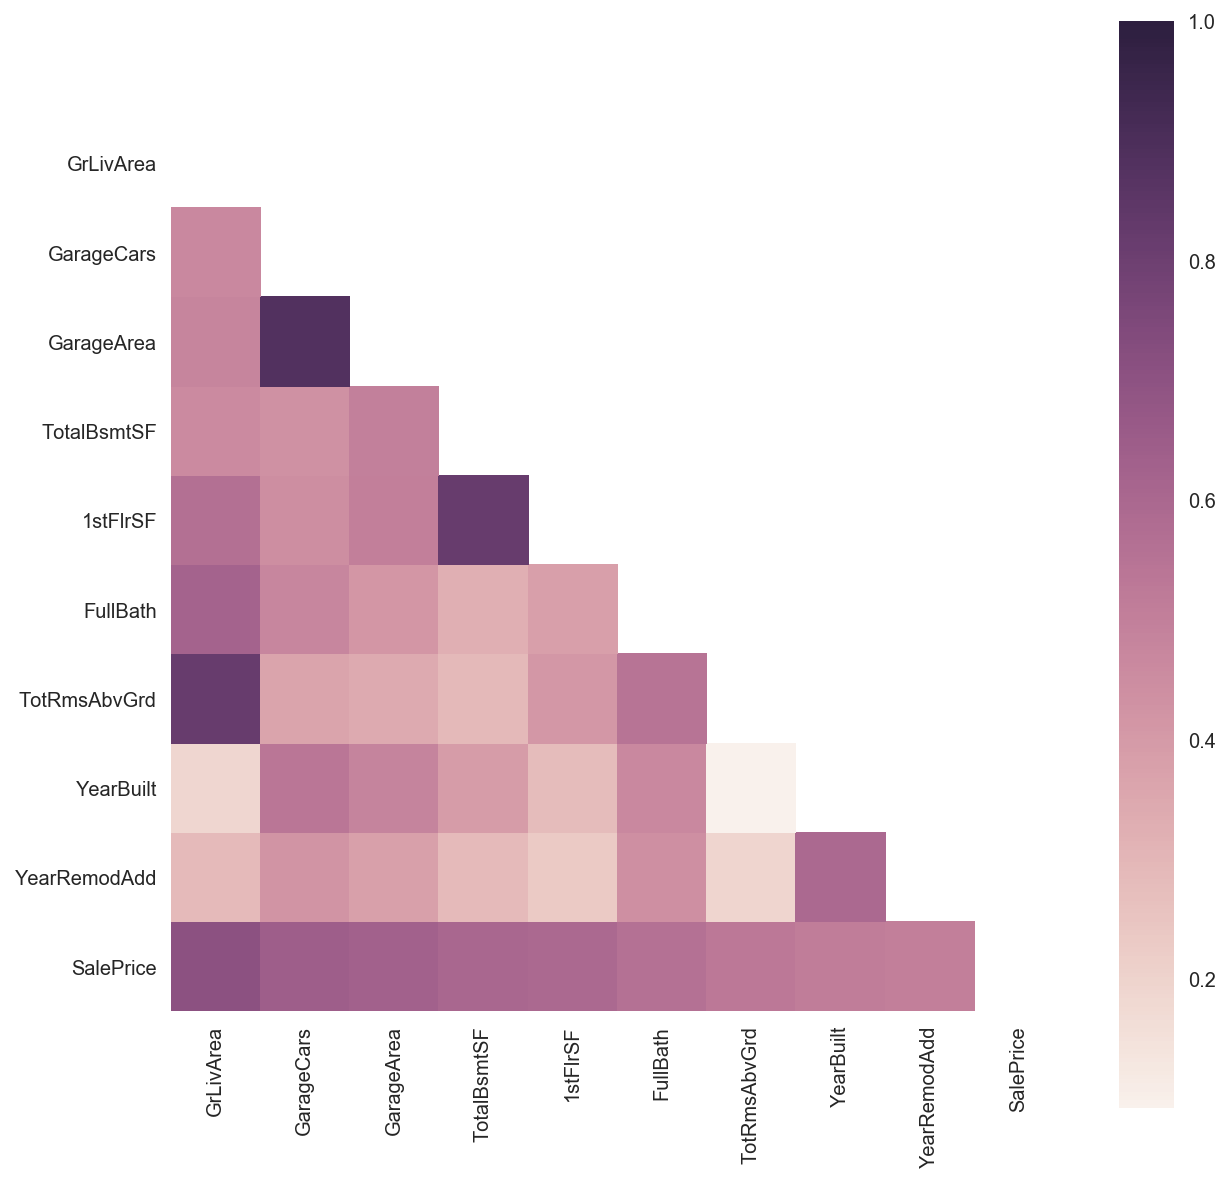

In [21]:
fixed_features = ['GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd','YearBuilt','YearRemodAdd','SalePrice']
train_fixed = train[fixed_features]
corr_matrix = train_fixed.corr()
f,ax = plt.subplots(figsize =(10,10))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Plot heatmap with seaborn
sns.heatmap(corr_matrix, vmax=1,square=True, mask=mask)

The heatmap shows that GarageCars/ GarageArea, TotRmsAbvGrd/GrLivArea and TotalBsmtSF/1stFirSF are highly correlated to each other. Multicollinearity is a problem because it undermines the statistical significance of an independent variable. 

GarageArea, TotalRmsAbvGrd and 1stFirstSF are dropped as they are less correlated to sales price.

In [22]:
drop_off = ['GarageArea','TotRmsAbvGrd','1stFlrSF']
train_predictors = train_fixed.drop(drop_off, axis =1)
train_predictors.head(10)

,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,SalePrice
0,1710,2,856,2,2003,2003,208500
1,1262,2,1262,2,1976,1976,181500
2,1786,2,920,2,2001,2002,223500
3,1717,3,756,1,1915,1970,140000
4,2198,3,1145,2,2000,2000,250000
5,1362,2,796,1,1993,1995,143000
6,1694,2,1686,2,2004,2005,307000
7,2090,2,1107,2,1973,1973,200000
8,1774,2,952,2,1931,1950,129900
9,1077,1,991,1,1939,1950,118000


### Remove impact of outliers on model

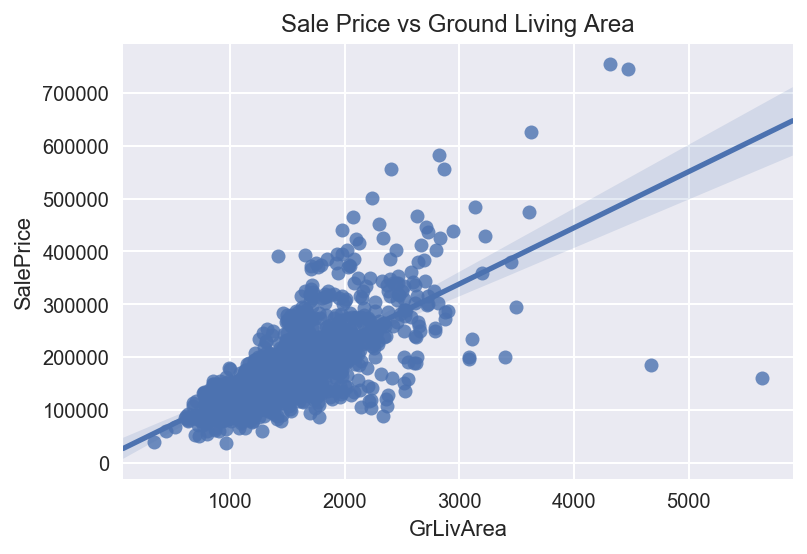

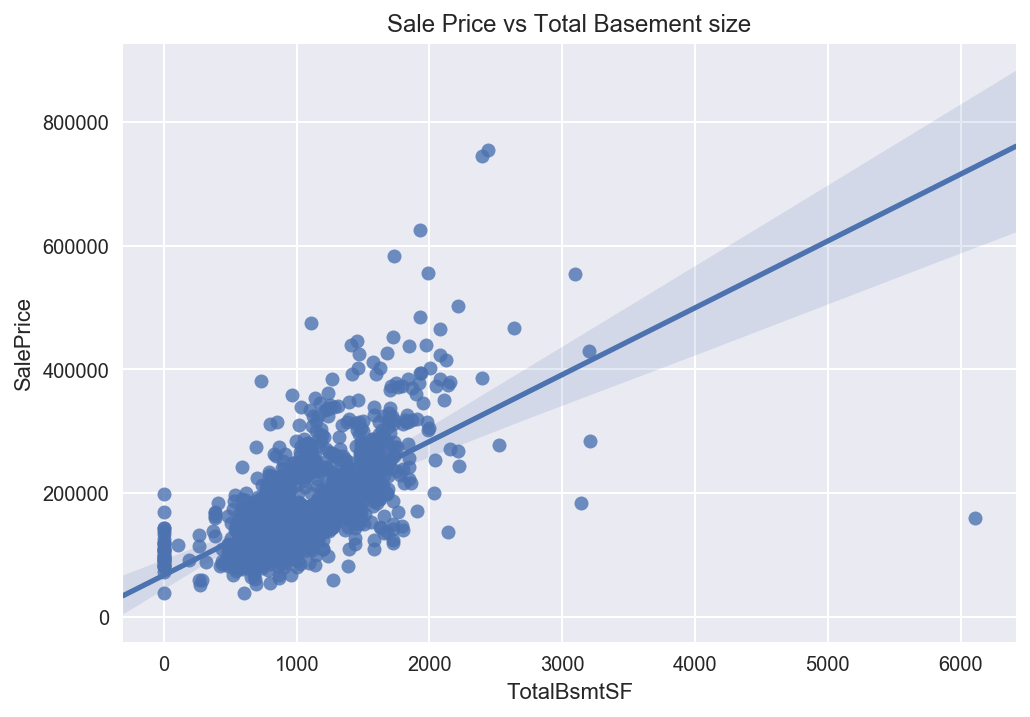

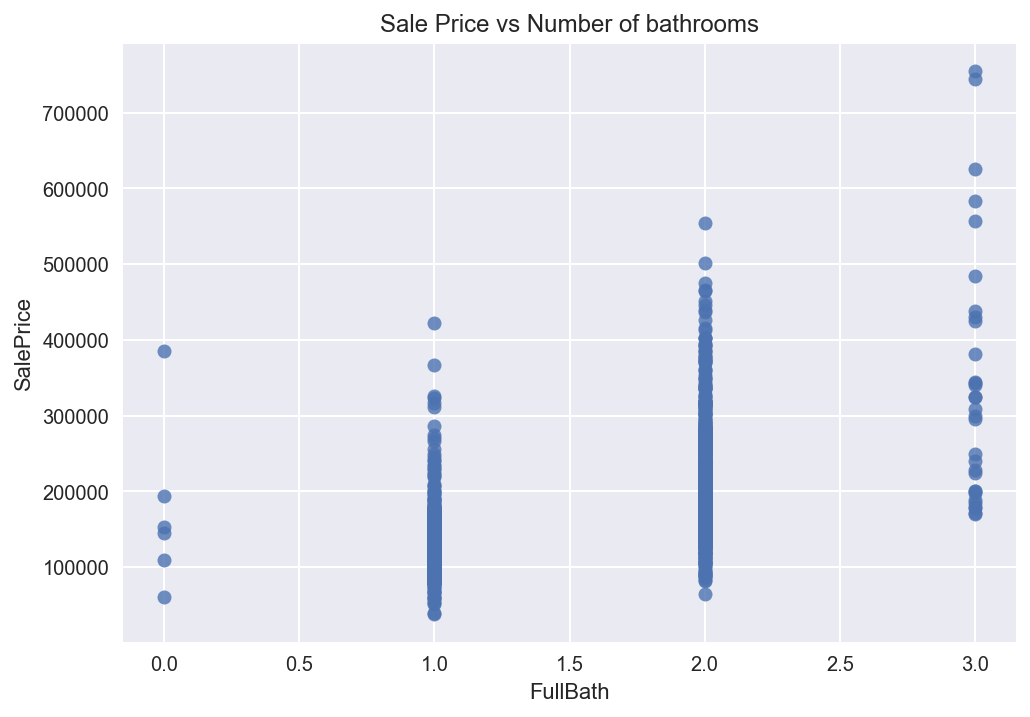

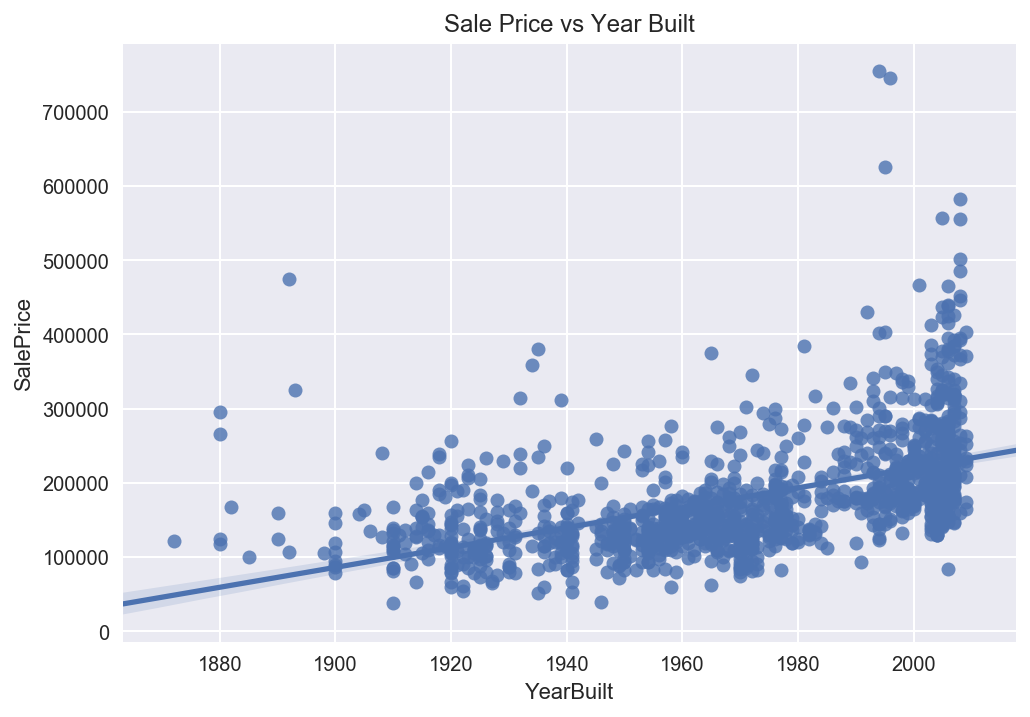

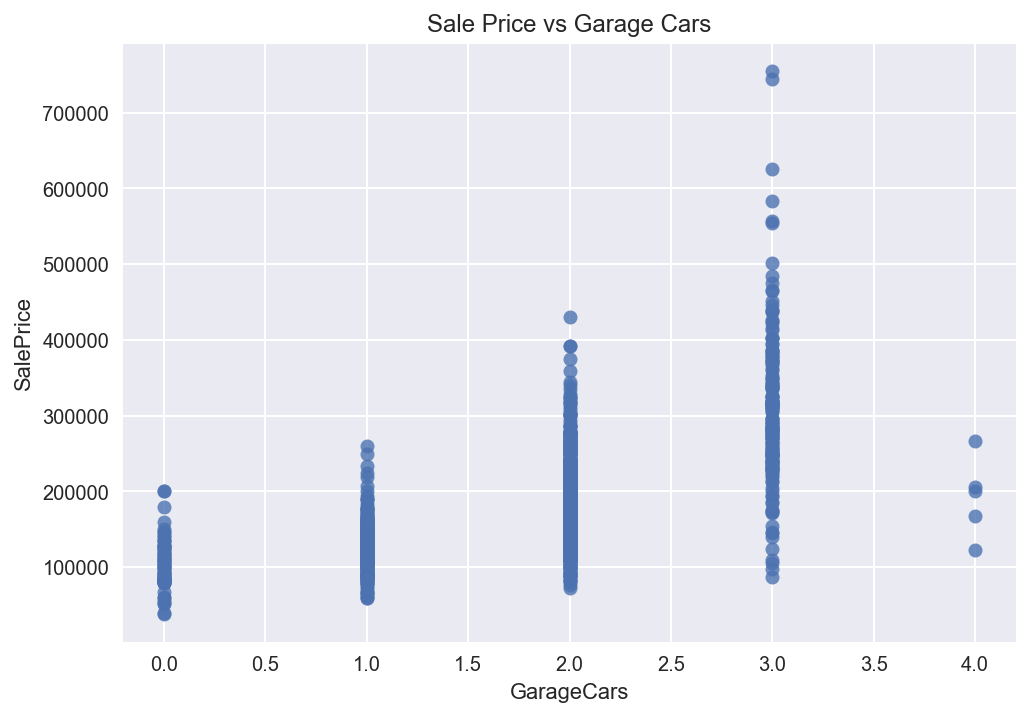

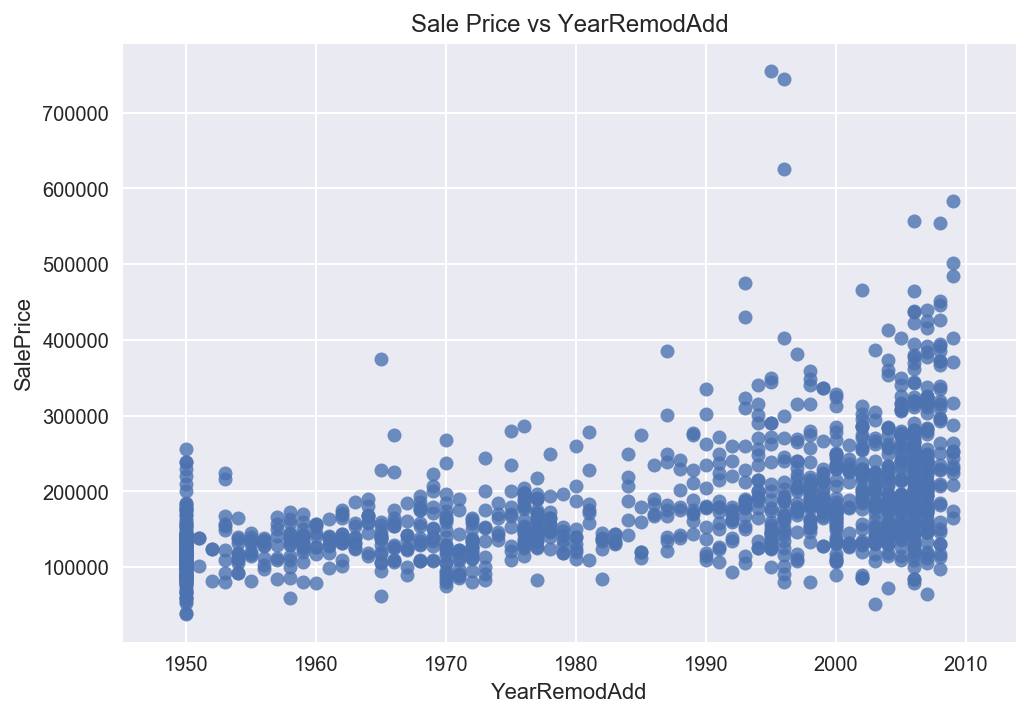

In [23]:
plt.figure(1)
sns.set(color_codes=True)
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=train_predictors)
plt.title('Sale Price vs Ground Living Area')

plt.figure(2)
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=train_predictors)
plt.title('Sale Price vs Total Basement size')

plt.figure(3)
sns.set(color_codes=True)
ax = sns.regplot(x="FullBath", y="SalePrice", data=train_predictors, fit_reg = False)
plt.title('Sale Price vs Number of bathrooms')

plt.figure(4)
sns.set(color_codes=True)
ax = sns.regplot(x="YearBuilt", y="SalePrice", data=train_predictors)
plt.title('Sale Price vs Year Built')

plt.figure(5)
sns.set(color_codes=True)
ax = sns.regplot(x="GarageCars", y="SalePrice", data=train_predictors, fit_reg = False)
plt.title('Sale Price vs Garage Cars')

plt.figure(6)
sns.set(color_codes=True)
ax = sns.regplot(x="YearRemodAdd", y="SalePrice", data=train_predictors, fit_reg = False)
plt.title('Sale Price vs YearRemodAdd')

In [24]:
train_predictors.sort_values(by = 'GrLivArea', ascending = False)[:10]

,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,SalePrice
1298,5642,2,6110,2,2008,2008,160000
523,4676,3,3138,3,2007,2008,184750
1182,4476,3,2396,3,1996,1996,745000
691,4316,3,2444,3,1994,1995,755000
1169,3627,3,1930,3,1995,1996,625000
185,3608,3,1107,2,1892,1993,475000
304,3493,3,1470,3,1880,2002,295000
1268,3447,3,728,3,1935,1997,381000
635,3395,0,1440,2,1914,1995,200000
496,3228,2,3200,3,1992,1993,430000


In [25]:
train_predictors.sort_values(by = 'SalePrice', ascending = False)[:10]

,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,SalePrice
691,4316,3,2444,3,1994,1995,755000
1182,4476,3,2396,3,1996,1996,745000
1169,3627,3,1930,3,1995,1996,625000
803,2822,3,1734,3,2008,2009,582933
1046,2868,3,1992,3,2005,2006,556581
440,2402,3,3094,2,2008,2008,555000
178,2234,3,2216,2,2008,2009,501837
798,3140,3,1926,3,2008,2009,485000
185,3608,3,1107,2,1892,1993,475000
1373,2633,3,2633,2,2001,2002,466500


Four outliers from the scatterplots above will be dropped. These corresponding to ground living area > 4500 and sales price between 7000 and 8000 in Year Built graph.The isolated TotalBsmtSF point > 6000 is also included as part of these outliers which will be removed.

In [26]:
train_predictors =train_predictors.drop(train_predictors[train_predictors.GrLivArea == 5642].index)
train_predictors =train_predictors.drop(train_predictors[train_predictors.GrLivArea == 4476].index)
train_predictors =train_predictors.drop(train_predictors[train_predictors.SalePrice == 755000].index)
train_predictors =train_predictors.drop(train_predictors[train_predictors.SalePrice == 745000].index)
train_predictors =train_predictors.drop(train_predictors[train_predictors.SalePrice == 625000].index)

### Standardizing predictors is required

With the Lasso and Ridge it is neccessary to standardize the predictor columns before constructing the models, even the dummy coded categorical variables.

In [27]:
# Choose a target/dependent variable that we will predict
target = 'SalePrice'

In [28]:
# select all the columns that are not the target
nc = [x for x in train_predictors.columns if x != target]

# Using the .ix indexing syntax, subtract mean and divide by standard deviation for all predictor columns.
#
# Remember: .ix indexing notation works like: data.ix[row_indices, column_indices]
# .ix is able to take a mix of boolean, number, or string specifications, which is useful.
#
# By subtracting the mean and dividing by the standard devation, the normalization procedure is putting 
# all of the predictor variables on the same scale (distributions with mean == 0 and standard deviation == 1)
train_predictors.ix[:, nc] = (train_predictors.ix[:, nc] - train_predictors.ix[:, nc].mean()) / train_predictors.ix[:, nc].std()

/Users/kamtingcheung/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # This is added back by InteractiveShellApp.init_path()


In [29]:
train_predictors.head()

,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,SalePrice
0,0.394518,0.297122,-0.475079,0.788789,1.041643,0.877515,208500
1,-0.501075,0.297122,0.501627,0.788789,0.150151,-0.432810,181500
2,0.546450,0.297122,-0.321116,0.788789,0.975607,0.828985,223500
3,0.408512,1.633648,-0.715648,-1.040225,-1.863960,-0.723994,140000
4,1.370076,1.633648,0.220162,0.788789,0.942588,0.731924,250000


### Applying pre-processing work to test data

In [30]:
fac = ['GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd']
X_test = test[fac]
y_test = test['SalePrice']

X_test.ix[:, :] = (X_test.ix[:, :] - X_test.ix[:, :].mean()) / X_test.ix[:, :].std()

/Users/kamtingcheung/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """
/Users/kamtingcheung/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Linear Regression

In [31]:
train_y = train_predictors['SalePrice']  #saving the output variable as a seperate dataset 
train_X = train_predictors.drop('SalePrice', axis =1) # dropping output variable from train dataset 

In [32]:
# Perform linear regression with all fixed features
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(train_X, train_y)

# Fit model on test data
from sklearn import metrics
y_predicted = lin_reg.predict(X_test)
print 'The R2 score for linear regression is ', lin_reg.score(X_test, y_test)
print 'RMSE for linear regression is ', np.sqrt(metrics.mean_squared_error(y_test, y_predicted))

The R2 score for linear regression is  0.786906060887
RMSE for linear regression is  36806.5648656


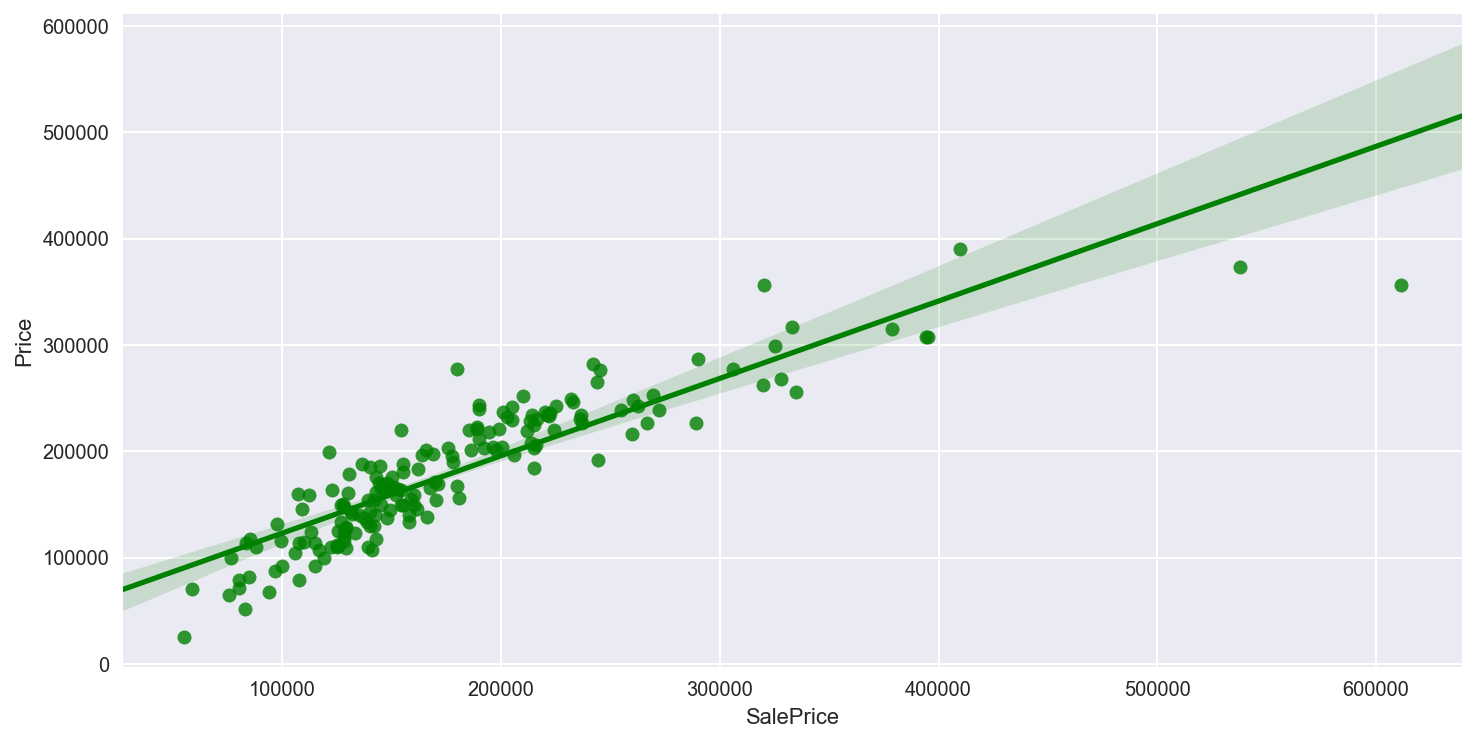

In [33]:
pred_house_2010 = pd.DataFrame()
pred_house_2010['Price'] = y_predicted

fig, ax_arr = plt.subplots(1,1, figsize=(12,6))

axis0 = sns.regplot(y_test, pred_house_2010['Price'], color='green', ax=ax_arr)

### Using Ridge and Lasso Regression

In [34]:
from sklearn import linear_model, svm
from sklearn.cross_validation import cross_val_score,cross_val_predict,StratifiedKFold

## Ridge Regression with built in cross validation ####
# by default it performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation.
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
clf_Ridge = linear_model.Ridge(fit_intercept=True, normalize=True, alpha = 0.001) 
clf_Ridge.fit(train_X, train_y)  
clf_Ridge_score = cross_val_score(clf_Ridge,train_X, train_y, cv = 10, scoring = 'r2')

#### LassoCV######
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
clf_lasso = linear_model.LassoCV()
clf_lasso.fit(train_X, train_y)
clf_lasso_score = cross_val_score(clf_lasso, train_X, train_y, cv = 10, scoring='r2') 

 #R squared coefficients for all the models after training 

print ''
print 'The R2 score for Ridge is', clf_Ridge_score.mean()
print 'The R2 score for Lasso is ', clf_lasso_score.mean()


# Fit model on test data
from sklearn import metrics
y_predd = clf_Ridge.predict(X_test)
print 'RMSE for Ridge is ', np.sqrt(metrics.mean_squared_error(y_test, y_predd))


y_pred = clf_lasso.predict(X_test)
print 'RMSE for Lasso is ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))


/Users/kamtingcheung/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



The R2 score for Ridge is 0.752049218986
The R2 score for Lasso is  0.752051429424
RMSE for Ridge is  36814.2669529
RMSE for Lasso is  36825.5433728


Linear regression gave the highest r2.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

### Residual in terms of variance in price

In [35]:
# Calculate the residuals from the first model

y_predicted = lin_reg.predict(X_test)
pred = pd.DataFrame()
pred['predId'] = test['Id']
pred["fixedPrediction"] = y_predicted
pred['SalePrice'] = y_test
pred['Residual'] = np.round(pred['SalePrice'] - pred['fixedPrediction'], 2)

In [36]:
pred.head()

,predId,fixedPrediction,SalePrice,Residual
16,17,144432.153082,149000,4567.85
24,25,150003.202852,154000,3996.80
26,27,140255.878879,134800,-5455.88
27,28,277224.634686,306000,28775.37
33,34,201541.138918,165500,-36041.14


### List of renovate-able features

In [37]:
reno_feats = ['Id', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
              'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 
              'Heating', 'HeatingQC', 'CentralAir','KitchenQual','Functional',
              'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',          
              'PavedDrive', 'PoolQC', 'Fence','OverallQual']
                        

In [38]:
house_reno = residential_house[reno_feats]

In [39]:
house_reno.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 26 columns):
Id              1449 non-null int64
RoofStyle       1449 non-null object
RoofMatl        1449 non-null object
Exterior1st     1449 non-null object
Exterior2nd     1449 non-null object
MasVnrType      0 non-null object
ExterQual       1449 non-null object
ExterCond       1449 non-null object
BsmtQual        0 non-null object
BsmtCond        0 non-null object
BsmtExposure    0 non-null object
BsmtFinType1    0 non-null object
BsmtFinType2    0 non-null object
Heating         1449 non-null object
HeatingQC       1449 non-null object
CentralAir      1449 non-null object
KitchenQual     1449 non-null object
Functional      1449 non-null object
FireplaceQu     0 non-null object
GarageFinish    0 non-null object
GarageQual      0 non-null object
GarageCond      0 non-null object
PavedDrive      1449 non-null object
PoolQC          0 non-null object
Fence           0 non-null object
Overa

### Convert categorial reno features to dummies

In [40]:
dum_col = ['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
           'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 
           'Heating', 'HeatingQC', 'CentralAir','KitchenQual','Functional',
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',          
           'PavedDrive', 'PoolQC', 'Fence']
       

In [41]:
dum = pd.get_dummies(residential_house[dum_col])

In [42]:
res_house_reno = house_reno.join(dum)

In [43]:
res_house_reno.head()

,Id,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,None,None,...,0,0,0,0,0,0,1,0,0,1
1,2,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,None,None,...,0,0,0,0,0,0,1,0,0,1
2,3,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,None,None,...,0,0,0,0,0,0,1,0,0,1
3,4,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,None,None,...,0,0,0,0,0,0,1,0,0,1
4,5,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,None,None,...,0,0,0,0,0,0,1,0,0,1


In [44]:
res_house_reno = res_house_reno.drop(dum_col, axis=1)

In [45]:
res_house_reno.head()

,Id,OverallQual,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,...,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1,7,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,2,6,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,3,7,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,4,7,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,5,8,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


### Merge residual (target) and res_house_reno (predictors) together

In [46]:
merge = pred[['predId', 'Residual']]

In [47]:
res_house_reno = res_house_reno.merge(merge, left_on='Id', right_on=['predId'], how='outer')

In [48]:
res_house_reno.head()

,Id,OverallQual,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,predId,Residual
0,1,7,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,NaN,NaN
1,2,6,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,NaN,NaN
2,3,7,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,NaN,NaN
3,4,7,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,NaN,NaN
4,5,8,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,NaN,NaN


In [88]:
# Outer merge will produce NaN on rows that do not fit merge condition
# Drop all NaN
res_house_reno.dropna(inplace=True)

In [89]:
# Remain only 2010 test rows
res_house_reno.head()

,Id,OverallQual,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,...,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y
16,17,6,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
24,25,5,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
26,27,5,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
27,28,8,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
32,34,5,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [51]:
# Check correlations of reno against Residual

corr2=res_house_reno.corr()['Residual']
corr2[np.argsort(corr2, axis=0)[::-1]]

print corr2

Id                     0.069713
OverallQual            0.280899
RoofStyle_Flat              NaN
RoofStyle_Gable       -0.183266
RoofStyle_Gambrel     -0.009952
RoofStyle_Hip          0.196693
RoofStyle_Mansard     -0.076698
RoofStyle_Shed         0.094117
RoofMatl_ClyTile            NaN
RoofMatl_CompShg      -0.009773
RoofMatl_Membran            NaN
RoofMatl_Metal              NaN
RoofMatl_Roll               NaN
RoofMatl_Tar&Grv            NaN
RoofMatl_WdShake       0.009773
RoofMatl_WdShngl            NaN
Exterior1st_AsbShng   -0.020342
Exterior1st_AsphShn    0.019784
Exterior1st_BrkComm         NaN
Exterior1st_BrkFace    0.064250
Exterior1st_CBlock          NaN
Exterior1st_CemntBd    0.136493
Exterior1st_HdBoard   -0.061169
Exterior1st_ImStucc         NaN
Exterior1st_MetalSd    0.019990
Exterior1st_Plywood   -0.136251
Exterior1st_Stone           NaN
Exterior1st_Stucco     0.080024
Exterior1st_VinylSd    0.056903
Exterior1st_Wd Sdng   -0.061536
                         ...   
ExterCon

In [52]:
# Creating the target from the residual

reno_target = res_house_reno['Residual'].astype(int)

In [53]:
# Tests and targets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
res_house_reno = res_house_reno.drop(['predId', 'Residual'], axis=1)
scaled_res_house_reno = scaler.fit_transform(res_house_reno)

In [54]:
X, y = scaled_res_house_reno, reno_target

In [55]:
from sklearn.model_selection import train_test_split

X_rtrain, X_rtest, y_rtrain, y_rtest = train_test_split(X, y, test_size=0.33)

print 'X_train :', X_rtrain.shape, '\n'
print 'y_train :', y_rtrain.shape, '\n'
print 'X_test :', X_rtest.shape, '\n'
print 'y_test :', y_rtest.shape, '\n'

X_train : (115, 83) 

y_train : (115,) 

X_test : (57, 83) 

y_test : (57,) 



In [90]:
# Using RidgeCV to come up with best coefficients

model_ridge = RidgeCV(alphas=(.001, .01, .1, 1, 10, 100)).fit(X_rtrain, y_rtrain)
res1 = np.sqrt(-cross_val_score(model_ridge,X_rtrain, y_rtrain, cv = 10, scoring = 'neg_mean_squared_error'))
res = cross_val_score(model_ridge,X_rtrain, y_rtrain, cv = 10)
print 'r2 ', res, res.mean()
print 'Mean:',res1.mean()
print 'Min: ',res1.min()

r2  [-0.33316177  0.23014834  0.17940142 -0.38462012 -0.65586088  0.52810813
 -0.16835987 -0.10367776  0.20471111  0.3795933 ] -0.0123718099591
Mean: 31603.0429321
Min:  13995.0745158


### Extract coefficients from ridge regression

In [57]:
coef = pd.Series(model_ridge.coef_, index = res_house_reno.columns)
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 59 variables and eliminated the other 24 variables


In [91]:
print coef

Id                     1.186733e+02
OverallQual            3.780081e+03
RoofStyle_Flat         0.000000e+00
RoofStyle_Gable       -1.037601e+03
RoofStyle_Gambrel     -3.548195e+02
RoofStyle_Hip          8.078532e+02
RoofStyle_Mansard     -5.396913e-26
RoofStyle_Shed         1.764934e+03
RoofMatl_ClyTile       0.000000e+00
RoofMatl_CompShg      -1.251662e+03
RoofMatl_Membran       0.000000e+00
RoofMatl_Metal         0.000000e+00
RoofMatl_Roll          0.000000e+00
RoofMatl_Tar&Grv       0.000000e+00
RoofMatl_WdShake       1.251662e+03
RoofMatl_WdShngl       0.000000e+00
Exterior1st_AsbShng   -2.319409e-26
Exterior1st_AsphShn    7.026345e+01
Exterior1st_BrkComm    0.000000e+00
Exterior1st_BrkFace    7.545037e+02
Exterior1st_CBlock     0.000000e+00
Exterior1st_CemntBd    1.946859e+03
Exterior1st_HdBoard   -7.160160e+02
Exterior1st_ImStucc    0.000000e+00
Exterior1st_MetalSd   -1.938942e+02
Exterior1st_Plywood   -1.080635e+03
Exterior1st_Stone      0.000000e+00
Exterior1st_Stucco    -6.416

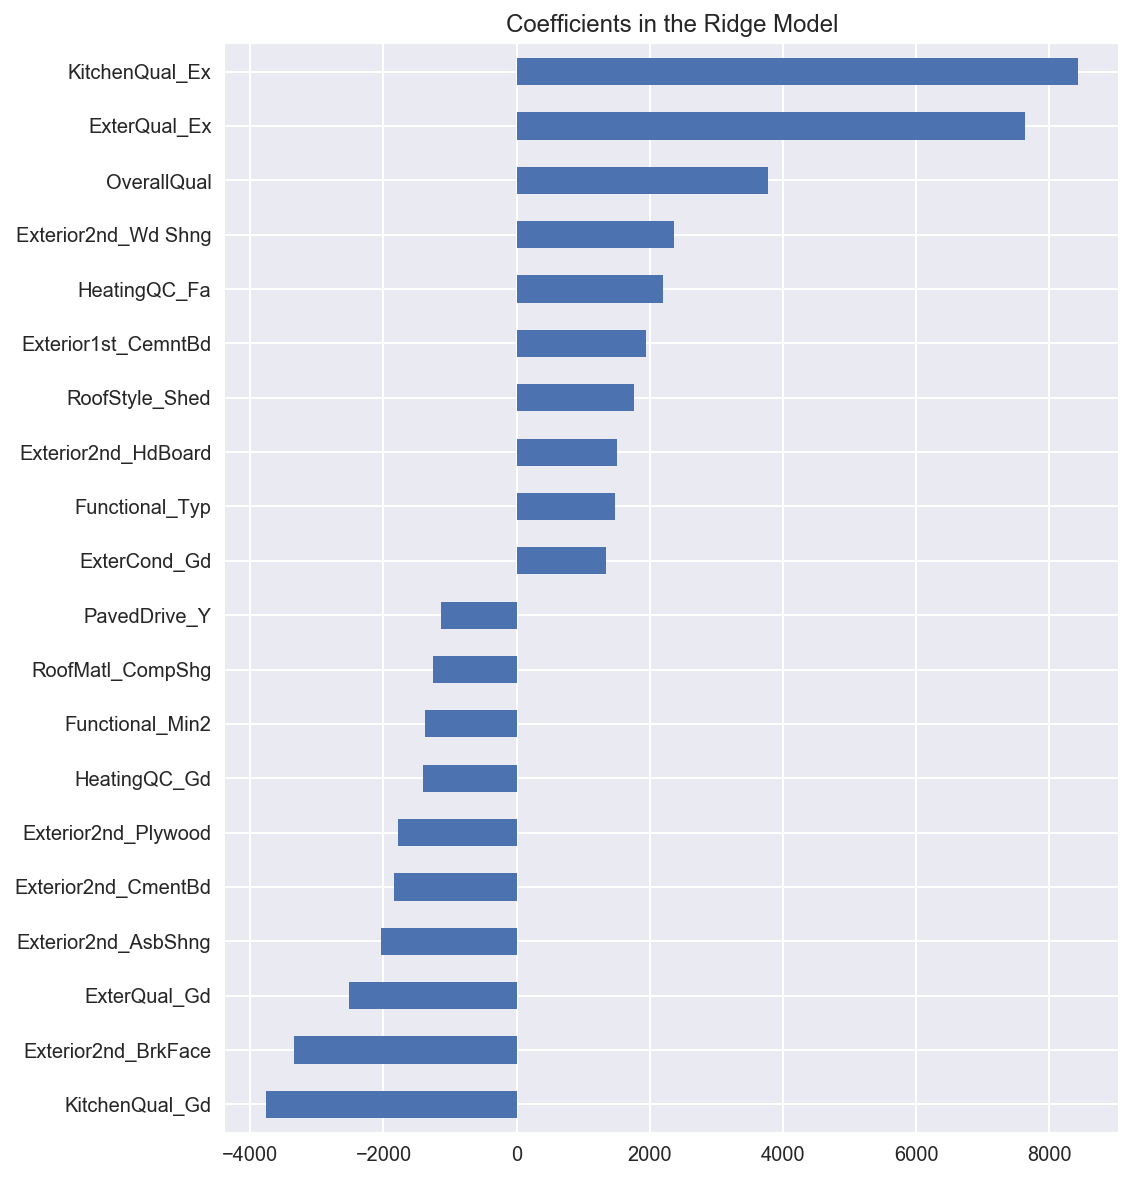

In [58]:
# Plotting the coefficients

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

In [92]:
# Creating a DataFrame of the ID and and renovate-able features sale prediction

reno_preds = model_ridge.predict(scaled_res_house_reno)
reno = pd.DataFrame()
reno['renoId'] = res_house_reno['Id']
reno['renoResidual'] = reno_preds

In [93]:
# Putting all of the data together in one DataFrame

comparison = reno.merge(pred, left_on='renoId', right_on='predId', how='inner')
comparison = comparison.round({'renoResidual': 2, 'fixedPrediction': 2, 'SalePrice': 2})

comparison.head()

,renoId,renoResidual,predId,fixedPrediction,SalePrice,Residual
0,17,566.61,17,144432.15,149000,4567.85
1,25,-12364.80,25,150003.20,154000,3996.80
2,27,-11569.84,27,140255.88,134800,-5455.88
3,28,-2016.35,28,277224.63,306000,28775.37
4,34,-33108.31,34,201541.14,165500,-36041.14


In [94]:
#comparison['combinedPred'] = comparison['renoPrediction'] + comparison['fixedPrediction'] 
comparison['NetResidual'] = comparison['Residual'] - comparison['renoResidual']

In [95]:
np.round(comparison.NetResidual.mean(),decimals=2)


-2524.52

In [98]:
np.round(comparison.Residual.mean(),decimals=2)

-1611.04

In [96]:
comparison.head()

,renoId,renoResidual,predId,fixedPrediction,SalePrice,Residual,NetResidual
0,17,566.61,17,144432.15,149000,4567.85,4001.24
1,25,-12364.80,25,150003.20,154000,3996.80,16361.60
2,27,-11569.84,27,140255.88,134800,-5455.88,6113.96
3,28,-2016.35,28,277224.63,306000,28775.37,30791.72
4,34,-33108.31,34,201541.14,165500,-36041.14,-2932.83


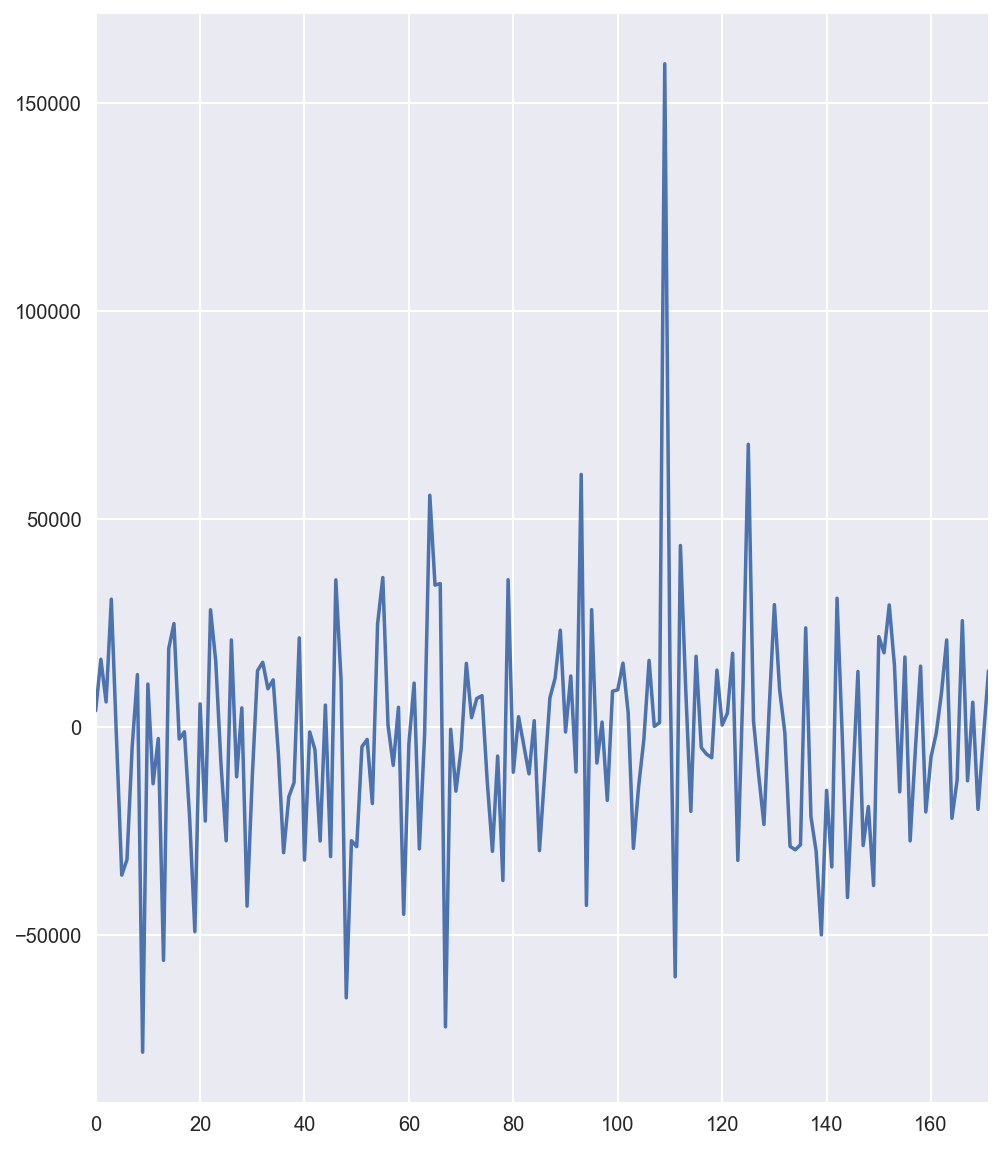

In [97]:
comparison.NetResidual.plot()

Combining my fixed features and reno features actually increases the residual as shown by the mean. The company should not rely on reno features and the model to make investment decision.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [65]:
residential_house['SaleCondition'].value_counts()

Normal     1193
Partial     125
Abnorml      96
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [66]:
residential_house['SaleCondition'] = [1 if b=='Abnorml' else 0 for b in residential_house['SaleCondition']]
 
residential_house['SaleCondition'].value_counts()

0    1353
1      96
Name: SaleCondition, dtype: int64

In [67]:
residential_house['SaleCondition'].value_counts()/sum(residential_house['SaleCondition'].value_counts())

0    0.933747
1    0.066253
Name: SaleCondition, dtype: float64

In [68]:
residential_house.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [69]:
all_dum = ['SaleType','MiscFeature','Fence','PoolQC','PavedDrive','GarageCond',
            'GarageQual','GarageFinish','GarageType','FireplaceQu','Functional',
           'KitchenQual','Electrical','CentralAir','HeatingQC','Heating','BsmtFinType2',
            'BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','Foundation',
           'ExterCond','ExterQual','MasVnrType','Exterior2nd','Exterior1st','RoofMatl',
            'RoofStyle','HouseStyle','BldgType','Condition2','Condition1','Neighborhood',
            'LandSlope','LotConfig','Utilities','LandContour','LotShape','Alley',
           'Street','MSZoning']

re_dum = pd.get_dummies(residential_house[all_dum])

In [70]:
re_dum['SaleCondition'] = residential_house['SaleCondition']

In [71]:
re_dum.head()

,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,PavedDrive_N,...,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Grvl,Street_Pave,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,SaleCondition
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


### Up-sample Minority Class

In [72]:
from sklearn.utils import resample

In [73]:
# Separate majority and minority classes
rh_majority = re_dum[re_dum['SaleCondition']==0]
rh_minority = re_dum[re_dum['SaleCondition']==1]
 

In [74]:
# Upsample minority class
rh_minority_upsampled = resample(rh_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1353,    # to match majority class
                                 random_state=123) # reproducible results

In [75]:
# Combine majority class with upsampled minority class
rh_upsampled = pd.concat([rh_majority, rh_minority_upsampled])

In [76]:
# Display new class counts
rh_upsampled.SaleCondition.value_counts()

1    1353
0    1353
Name: SaleCondition, dtype: int64

In [77]:
# Separate input features (X) and target variable (y)
y = rh_upsampled.SaleCondition
X = rh_upsampled.drop('SaleCondition', axis=1)

X_ltrain, X_ltest, y_ltrain, y_ltest = train_test_split(X, y, train_size=0.7, random_state=8)

# Train model
from sklearn.linear_model import LogisticRegression
clf_1 = LogisticRegression().fit(X_ltrain, y_ltrain)

# Predict on training set
pred_y_1 = clf_1.predict(X_ltest)

# Is our model still predicting just one class?
print np.unique( pred_y_1 ) 

# How's our accuracy?
print metrics.accuracy_score(y_ltest, pred_y_1)

[0 1]
0.805418719212


### Penalize Algorithms (Cost-Sensitive Training)

Use penalized learning algorithms that increase the cost of classification mistakes on the minority class. A popular algorithm for this technique is Penalized-Support Vector Machine:

In [78]:
from sklearn.svm import SVC

In [79]:
# Separate input features (X_tree) and target variable (y_tree)
y_svc = re_dum.SaleCondition
X_svc = re_dum.drop('SaleCondition', axis=1)

In [80]:
X_strain, X_stest, y_strain, y_stest = train_test_split(X_svc, y_svc, train_size=0.7, random_state=8)

In [81]:
# Train model
clf_3 = SVC(kernel='rbf', 
            class_weight={0:1,1:10},
            probability=True)
 
clf_3.fit(X_strain, y_strain)

SVC(C=1.0, cache_size=200, class_weight={0: 1, 1: 10}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
# Predict on training set
pred_y_3 = clf_3.predict(X_stest)

In [83]:
# Is our model still predicting just one class?
print np.unique( pred_y_3 ) 

[0 1]


In [84]:
# How's our accuracy?
print metrics.accuracy_score(y_stest, pred_y_3) 

0.935632183908


In [85]:
from sklearn.metrics import classification_report
df_confusion = pd.crosstab(y_stest, pred_y_3, rownames=['Actual'], colnames=['Predicted'], margins=True)

print df_confusion
print classification_report(y_stest, pred_y_3)

Predicted    0   1  All
Actual                 
0          396   3  399
1           25  11   36
All        421  14  435
             precision    recall  f1-score   support

          0       0.94      0.99      0.97       399
          1       0.79      0.31      0.44        36

avg / total       0.93      0.94      0.92       435

